<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Линейная регрессия: MSE = 3712557943.41, R² = 0.08


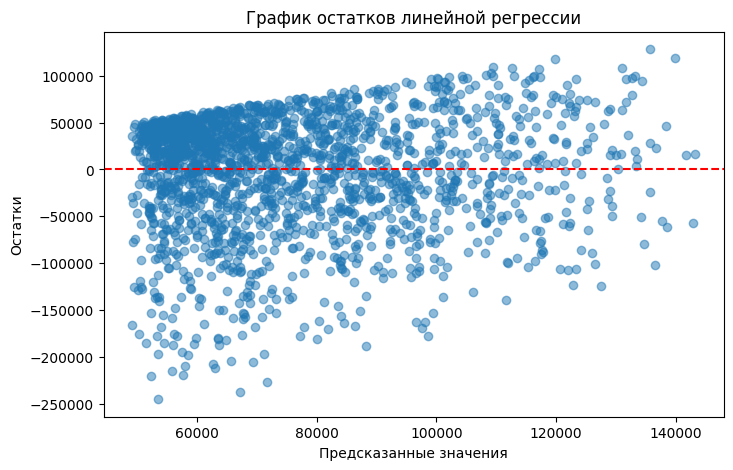

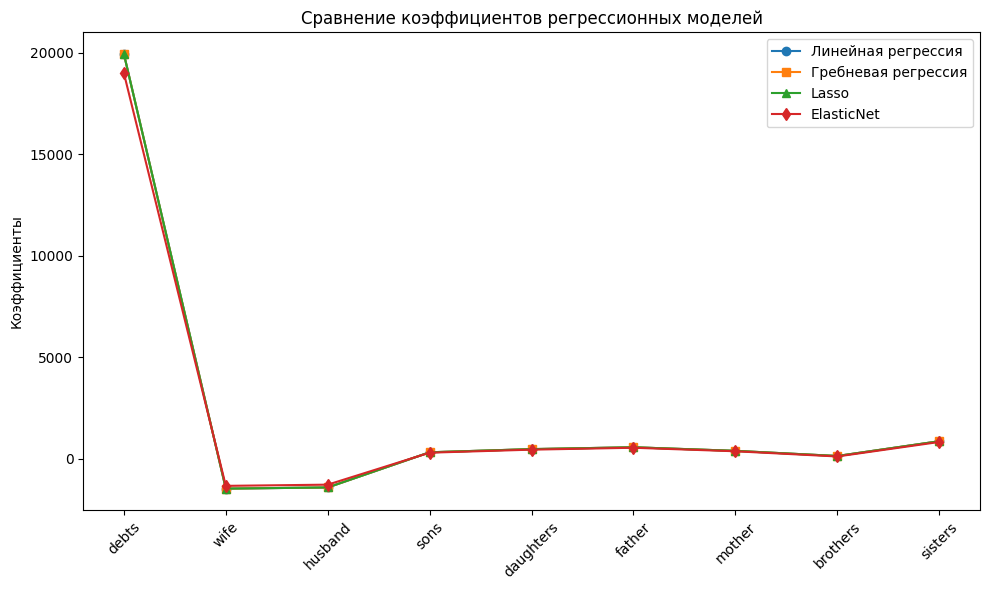

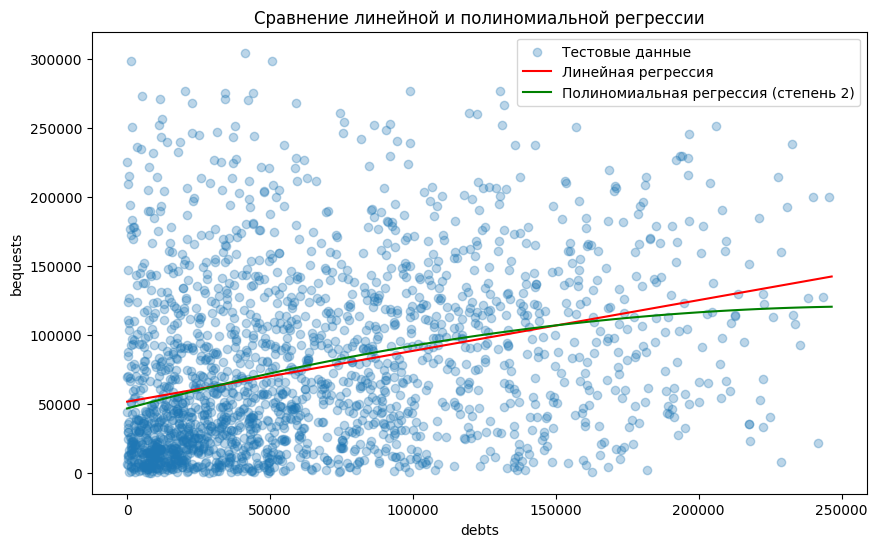


Выводы:
1. Линейная регрессия хорошо описывает данные, но полиномиальная регрессия учитывает нелинейные зависимости.
2. Регуляризованные методы помогают уменьшить переобучение и стабилизировать коэффициенты.
3. График остатков показывает, что остатки случайны, что подтверждает корректность модели.
4. Для данной задачи полиномиальная регрессия 2-й степени является предпочтительной.



In [1]:
# -------------------------------------------------------------- ЛАБОРАТОРНАЯ РАБОТА №9: Методы регрессионного анализа

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Загрузка и подготовка данных ---
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_combined.csv"
df = pd.read_csv(url)

# Выбираем признаки и целевой признак (предсказываем 'bequests')
feature_cols = ['debts', 'wife', 'husband', 'sons', 'daughters', 'father', 'mother', 'brothers', 'sisters']
X = df[feature_cols]
y = df['bequests']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 2. Линейная регрессия (метод наименьших квадратов) ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# --- 3. Оценка качества линейной модели ---
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Линейная регрессия: MSE = {mse_lin:.2f}, R² = {r2_lin:.2f}")

# График остатков
plt.figure(figsize=(8,5))
plt.scatter(y_pred_lin, y_pred_lin - y_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков линейной регрессии")
plt.show()

# --- 4. Регуляризованные методы ---

# Гребневая регрессия (Ridge)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso регрессия
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

# --- 5. Сравнение коэффициентов моделей ---
plt.figure(figsize=(10,6))
plt.plot(lin_reg.coef_, 'o-', label='Линейная регрессия')
plt.plot(ridge.coef_, 's-', label='Гребневая регрессия')
plt.plot(lasso.coef_, '^-', label='Lasso')
plt.plot(elastic.coef_, 'd-', label='ElasticNet')
plt.xticks(ticks=range(len(feature_cols)), labels=feature_cols, rotation=45)
plt.ylabel("Коэффициенты")
plt.title("Сравнение коэффициентов регрессионных моделей")
plt.legend()
plt.tight_layout()
plt.show()

# --- 6. Полиномиальная регрессия ---
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)

# Для наглядности возьмем один признак 'debts'
X_single = df[['debts']].values
y_single = df['bequests'].values

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

X_train_poly = poly.fit_transform(X_train_s)
X_test_poly = poly.transform(X_test_s)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_s)

# Предсказания для графика
X_grid = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1,1)
X_grid_poly = poly.transform(X_grid)
y_grid_lin = LinearRegression().fit(X_train_s, y_train_s).predict(X_grid)
y_grid_poly = poly_reg.predict(X_grid_poly)

# --- 7. График сравнения линейной и полиномиальной регрессии ---
plt.figure(figsize=(10,6))
plt.scatter(X_test_s, y_test_s, alpha=0.3, label='Тестовые данные')
plt.plot(X_grid, y_grid_lin, 'r-', label='Линейная регрессия')
plt.plot(X_grid, y_grid_poly, 'g-', label=f'Полиномиальная регрессия (степень {poly_degree})')
plt.xlabel('debts')
plt.ylabel('bequests')
plt.title('Сравнение линейной и полиномиальной регрессии')
plt.legend()
plt.show()

# --- 8. Выводы ---
print("""
Выводы:
1. Линейная регрессия хорошо описывает данные, но полиномиальная регрессия учитывает нелинейные зависимости.
2. Регуляризованные методы помогают уменьшить переобучение и стабилизировать коэффициенты.
3. График остатков показывает, что остатки случайны, что подтверждает корректность модели.
4. Для данной задачи полиномиальная регрессия 2-й степени является предпочтительной.
""")
